# 1.1.3 Измерение вязкости воздуха по течению в тонких трубках

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lin_ls(x, y, through_null=False):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        if len(x) != len(y):
            raise ValueError("Incompatible x and y vectors. They must have the same length.")
        if through_null:
            k = np.mean(x * y) / np.mean(x * x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt(np.mean(y * y) / np.mean(x * x) - k ** 2)
            return k, s_k
        else:
            xy = np.mean(x * y)
            x1y = np.mean(x) * np.mean(y)
            x2 = np.mean(x * x)
            x12 = np.mean(x) ** 2
            y2 = np.mean(y * y)
            y12 = np.mean(y) ** 2
            k = (xy - x1y) / (x2 - x12)
            b = np.mean(y) - k * np.mean(x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt((y2 - y12) / (x2 - x12) - k ** 2)
            s_b = s_k * np.sqrt(x2 - x12)
            return k, s_k, b, s_b
    else:
        raise ValueError("Invalid x or/and y type. Must be numpy.ndarray.")

Коэффиценты прямой: k, s_k, b, s_b
0.9009628838750511	0.02453006552735716	4.04258262874712	0.6941450539189179
n = 1924.458004979332 +- 110.16691364916892
Re = 874.2926434765326 +- 63.48465272909052
Коэффиценты прямой: k, s_k, b, s_b
2.13760563113557	0.24797190774394925	30.614285714285515	3.5966601571060703
n = 1679.0193003283214 +- 205.8859568961038
Re = 1316.8576678969553 +- 188.38654611129115
Коэффиценты прямой: k, s_k, b, s_b
0.8001321332549044	0.03965496607728709	5.806199021207142	1.0893205449232846
n = 828.2128323866251 +- 118.61615749210652
Re = 2502.779355465489 +- 433.5139844241385


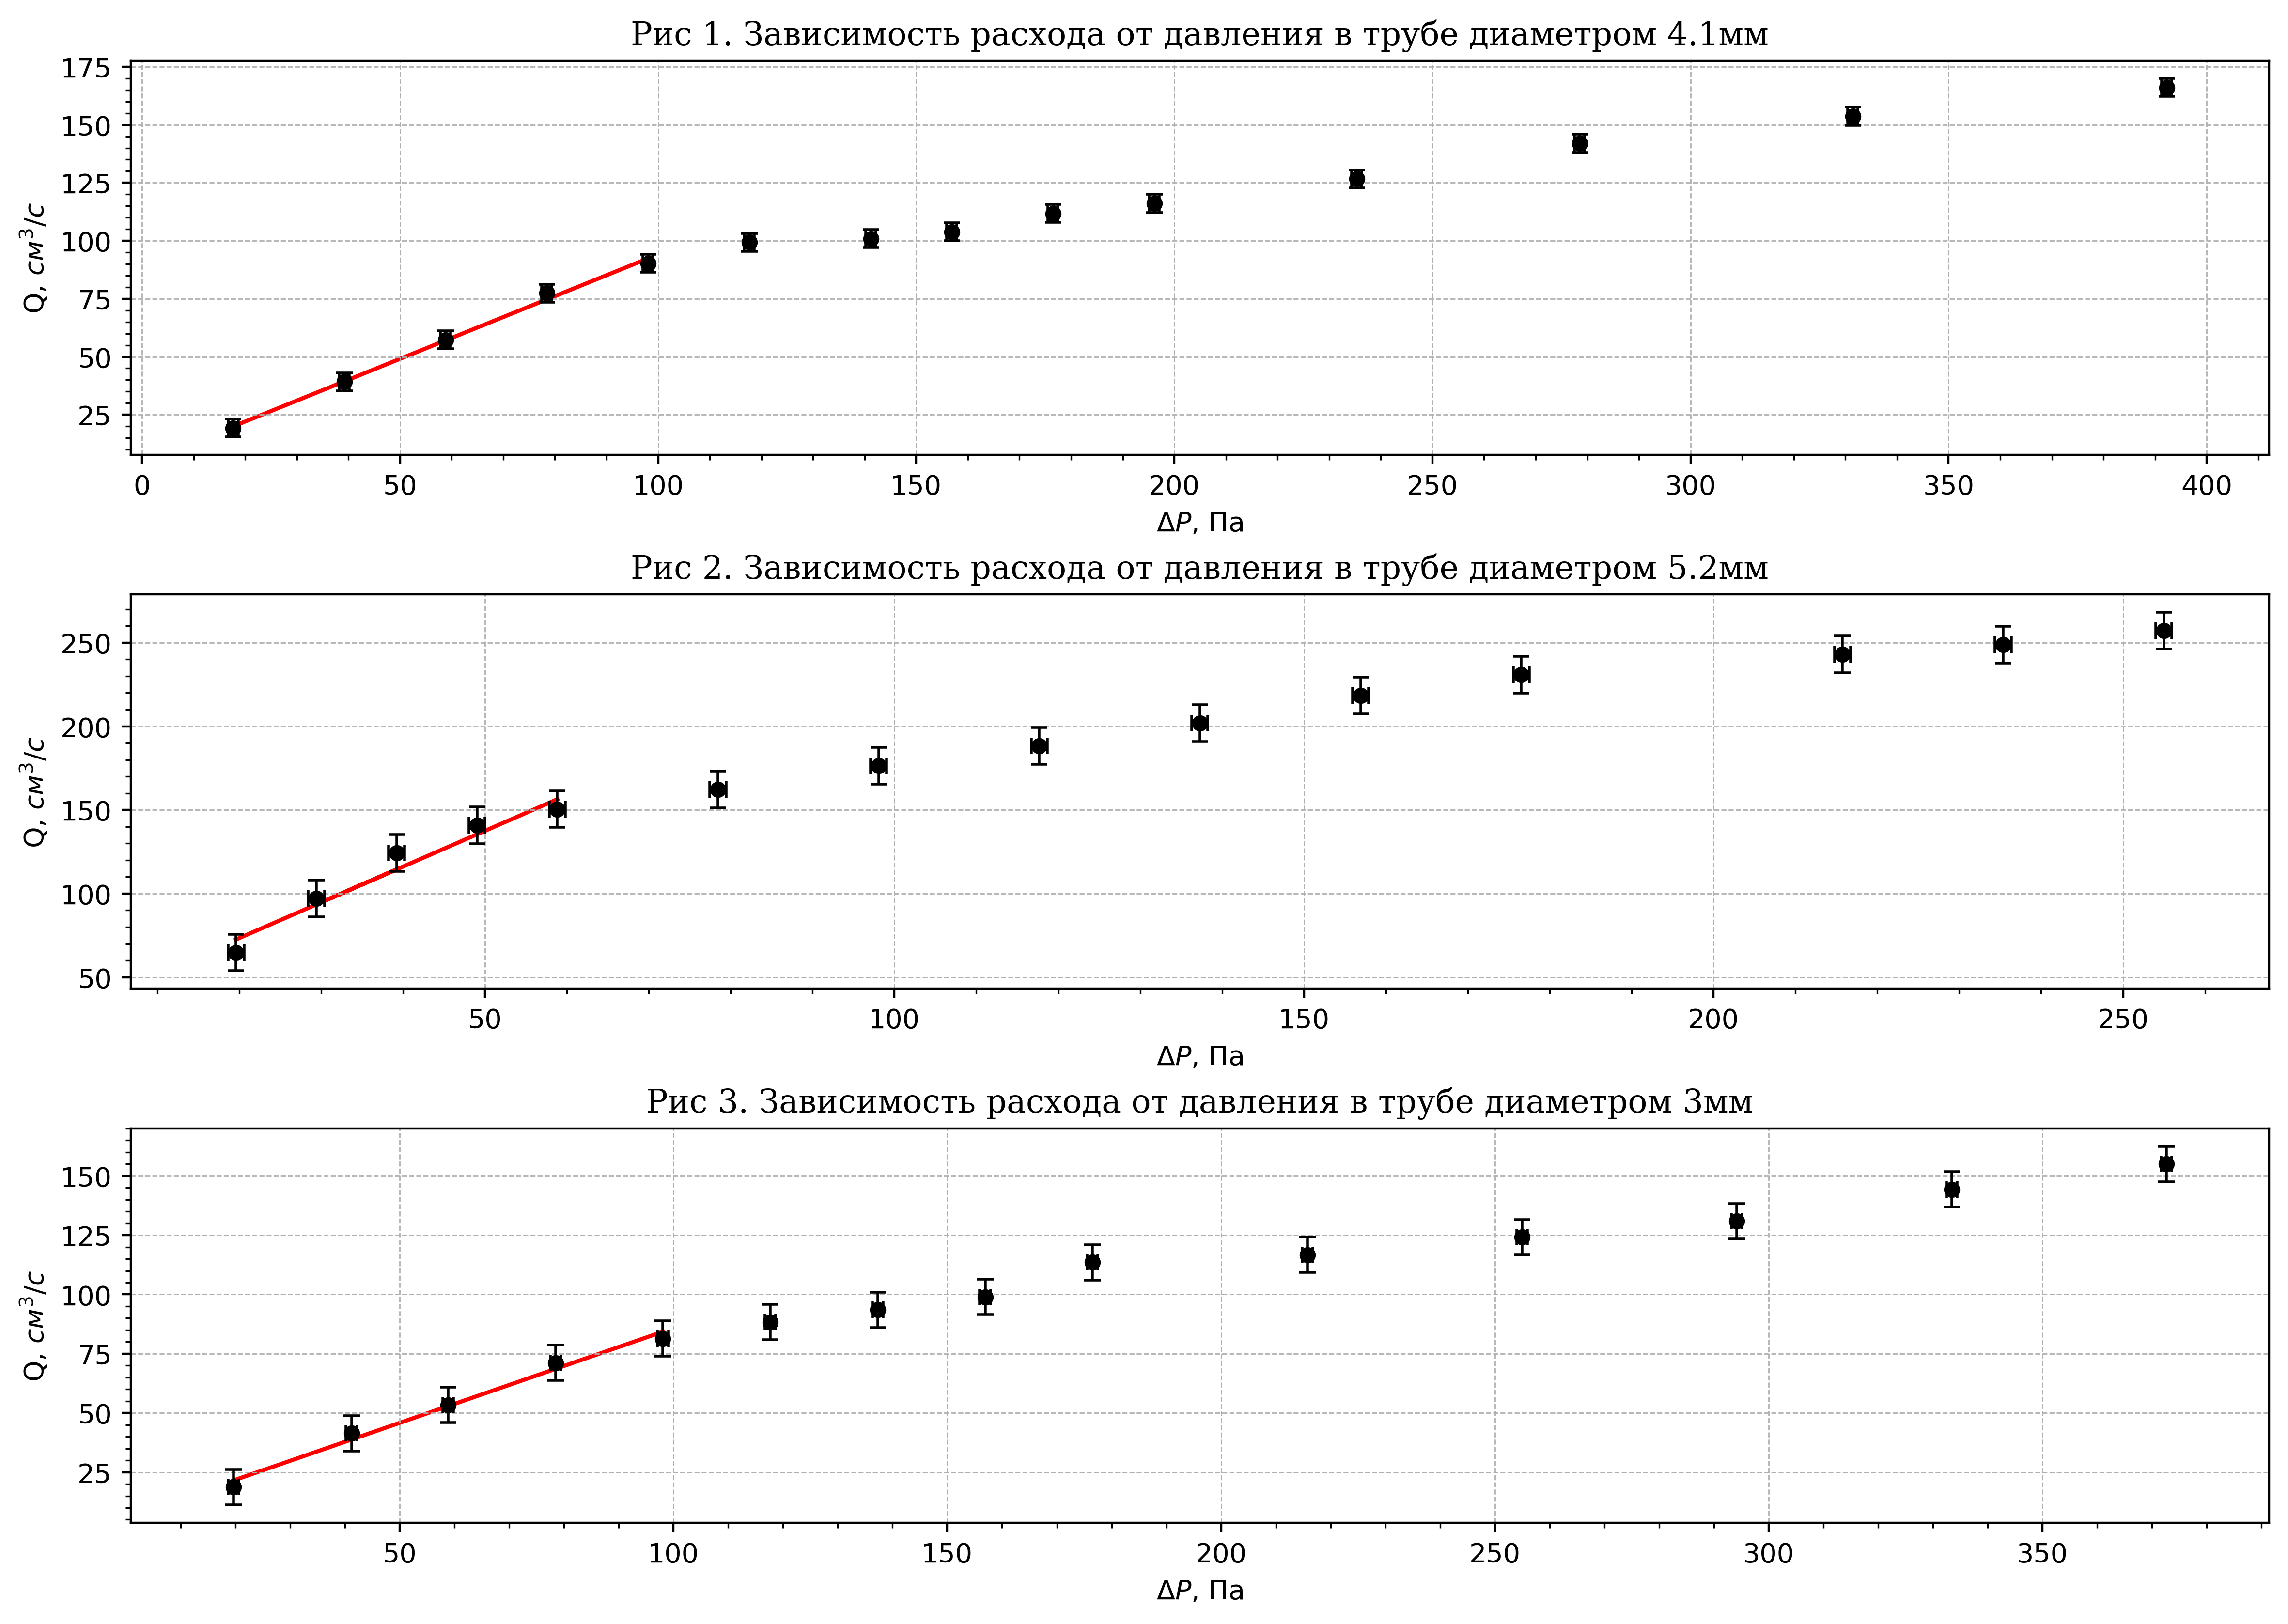

In [2]:
FONT = {'fontname': 'DejaVu Serif'}
fig1 = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')
spec = fig1.add_gridspec(3, 1)
ax4_1 = fig1.add_subplot(spec[0, 0])
ax5_2 = fig1.add_subplot(spec[1, 0])
ax3 = fig1.add_subplot(spec[2, 0])

[ax.minorticks_on() for ax in fig1.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5) for ax in fig1.axes]
[ax.set_xlabel('$\Delta P$, Па') for ax in fig1.axes]
[ax.set_ylabel('Q, $cм^{3}/с$') for ax in fig1.axes]
ax4_1.set_title('Рис 1. Зависимость расхода от давления в трубе диаметром 4.1мм', **FONT) 
ax5_2.set_title('Рис 2. Зависимость расхода от давления в трубе диаметром 5.2мм', **FONT) 
ax3.set_title('Рис 3. Зависимость расхода от давления в трубе диаметром 3мм', **FONT) 
#####################################################
Qs4_1 = np.array( [19.31, 39.2, 57.3, 77.4, 90.3, 99.3, 100.9, 103.8, 111.8, 116.1, 126.7, 142, 153.7, 166.1] )
hs4_1 = np.array( [9, 20, 30, 40, 50, 60, 72, 80, 90, 100, 120, 142, 169, 200] )
dPs4_1 = hs4_1 * 0.2 * 9.8067 # checked this

X_ERR = 0.2 * 9.8067 * 0.5  # 1/2 цены деления
sigma_dV = 0.01
sigma_dt = 0.31
dt = 12.64 # min
dV = 2000
Y_ERR = np.sqrt(
    np.square( sigma_dV / dt ) +
    np.square( dV * sigma_dt / (dt**2) )
) 
ax4_1.errorbar(dPs4_1, Qs4_1, fmt='ko', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3
)

LINEAR_TILL = 5
(k, s_k, b, s_b) = lin_ls(dPs4_1[:LINEAR_TILL], Qs4_1[:LINEAR_TILL], through_null=False)
ax4_1.plot(dPs4_1[:LINEAR_TILL], dPs4_1[:LINEAR_TILL] * k + b, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')

n = np.pi * (4.1 / 2)**4  / (8 * k * 40)
sigma_n = np.sqrt(
    np.square( np.pi * 4 * (4.1/2)**3 * (0.05 / 2) / (8 * k * 40) ) +
    np.square( np.pi * (4.1/2)**4 * s_k / (8 * (k**2) * 40) ) +
    np.square( np.pi * (4.1/2)**4 * 0.5 / (8 * k * (40**2)) ) 
)
print(f'n = {n * 1e4} +- {sigma_n * 1e4}')

Re = 1.2 * Qs4_1[LINEAR_TILL - 1] / (n * np.pi * (4.1 / 2))
sigma_Re = np.sqrt(
    np.square( (1.2 / np.pi) * Y_ERR  / (n * (4.1 / 2)) ) +
    np.square( (1.2 / np.pi) * Qs4_1[LINEAR_TILL - 1] * sigma_n / (n**2 * (4.1 / 2)) ) +
    np.square( (1.2 / np.pi) * Qs4_1[LINEAR_TILL - 1] * (0.05 / 2) / (n * (4.1 / 2) ** 2) )
)
print(f'Re = {Re * 10} +- {sigma_Re * 10}')
#####################################################
Qs5_2 = np.array( [64.8, 124.4, 97.2, 150.5, 140.9, 162.3, 176.5, 188.3, 202.0, 230.9, 243.0, 257.1, 248.9, 218.5] )
hs5_2 = np.array( [10, 20, 15, 30, 25, 40, 50, 60, 70, 90, 110, 130, 120, 80] )
dPs5_2 = hs5_2 * 0.2 * 9.8067 # checked this
X_ERR = 0.2 * 9.8067 * 0.5  # 1/2 цены деления
sigma_dV = 0.01
sigma_dt = 0.31
dt = 10.62 # min
dV = 4000
Y_ERR = np.sqrt(
    np.square( sigma_dV / dt ) +
    np.square( dV * sigma_dt / (dt**2) )
) 
ax5_2.errorbar(dPs5_2, Qs5_2, fmt='ko', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3
)

LINEAR_TILL = 4
(k, s_k, b, s_b) = lin_ls(dPs5_2[:LINEAR_TILL], Qs5_2[:LINEAR_TILL], through_null=False)
ax5_2.plot(dPs5_2[:LINEAR_TILL], dPs5_2[:LINEAR_TILL] * k + b, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')

n = np.pi * (5.2 / 2)**4  / (8 * k * 50)
sigma_n = np.sqrt(
    np.square( np.pi * 4 * (5.2/2)**3 * (0.05 / 2) / (8 * k * 50) ) +
    np.square( np.pi * (5.2/2)**4 * s_k / (8 * (k**2) * 50) ) +
    np.square( np.pi * (5.2/2)**4 * 0.5 / (8 * k * (50**2)) ) 
)
print(f'n = {n * 1e4} +- {sigma_n * 1e4}')

Re = 1.2 * Qs5_2[LINEAR_TILL - 1] / (n * np.pi * (5.2 / 2))
sigma_Re = np.sqrt(
    np.square( (1.2 / np.pi) * Y_ERR  / (n * (5.2 / 2)) ) +
    np.square( (1.2 / np.pi) * Qs5_2[LINEAR_TILL - 1] * sigma_n / (n**2 * (5.2 / 2)) ) +
    np.square( (1.2 / np.pi) * Qs5_2[LINEAR_TILL - 1] * (0.05 / 2) / (n * (5.2 / 2) ** 2) )
)
print(f'Re = {Re * 10} +- {sigma_Re * 10}')
#####################################################
Qs3 = np.array( [18.7, 41.4, 53.4, 71.1, 81.4, 88.3, 93.5, 98.9, 113.5, 116.7, 124.1, 130.9, 144.3, 155] )
hs3 = np.array( [10, 21, 30, 40, 50, 60, 70, 80, 90, 110, 130, 150, 170, 190] )
dPs3 = hs3 * 0.2 * 9.8067
X_ERR = 0.2 * 9.8067 * 0.5  # 1/2 цены деления
sigma_dV = 0.01
sigma_dt = 0.31
dt = 6.45 # min
dV = 1000
Y_ERR = np.sqrt(
    np.square( sigma_dV / dt ) +
    np.square( dV * sigma_dt / (dt**2) )
) 
ax3.errorbar(dPs3, Qs3, fmt='ko', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3
)

LINEAR_TILL = 5
(k, s_k, b, s_b) = lin_ls(dPs3[:LINEAR_TILL], Qs3[:LINEAR_TILL], through_null=False)
ax3.plot(dPs3[:LINEAR_TILL], dPs3[:LINEAR_TILL] * k + b, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')

n = np.pi * (3 / 2)**4  / (8 * k * 30)
sigma_n = np.sqrt(
    np.square( np.pi * 4 * (3/2)**3 * (0.1 / 2) / (8 * k * 30) ) +
    np.square( np.pi * (3/2)**4 * s_k / (8 * (k**2) * 30) ) +
    np.square( np.pi * (3/2)**4 * 0.5 / (8 * k * (30**2)) ) 
)
print(f'n = {n * 1e4} +- {sigma_n * 1e4}')

Re = 1.2 * Qs3[LINEAR_TILL - 1] / (n * np.pi * (3 / 2))
sigma_Re = np.sqrt(
    np.square( (1.2 / np.pi) * Y_ERR  / (n * (3 / 2)) ) +
    np.square( (1.2 / np.pi) * Qs3[LINEAR_TILL - 1] * sigma_n / (n**2 * (3 / 2)) ) +
    np.square( (1.2 / np.pi) * Qs3[LINEAR_TILL - 1] * (0.1 / 2) / (n * (3 / 2) ** 2) )
)
print(f'Re = {Re * 10} +- {sigma_Re * 10}')

Коэффиценты прямой: k, s_k, b, s_b
2.2228456790119777	0.0653673087479402	101038.19110802472	2.941528893657309
Коэффиценты прямой: k, s_k, b, s_b
0.8607962962966642	0.03850851169388859	101210.27034259257	1.7328830262249864
Коэффиценты прямой: k, s_k, b, s_b
3.3651578947356433	0.041210517225008805	101123.91473684215	0.8467956315047948


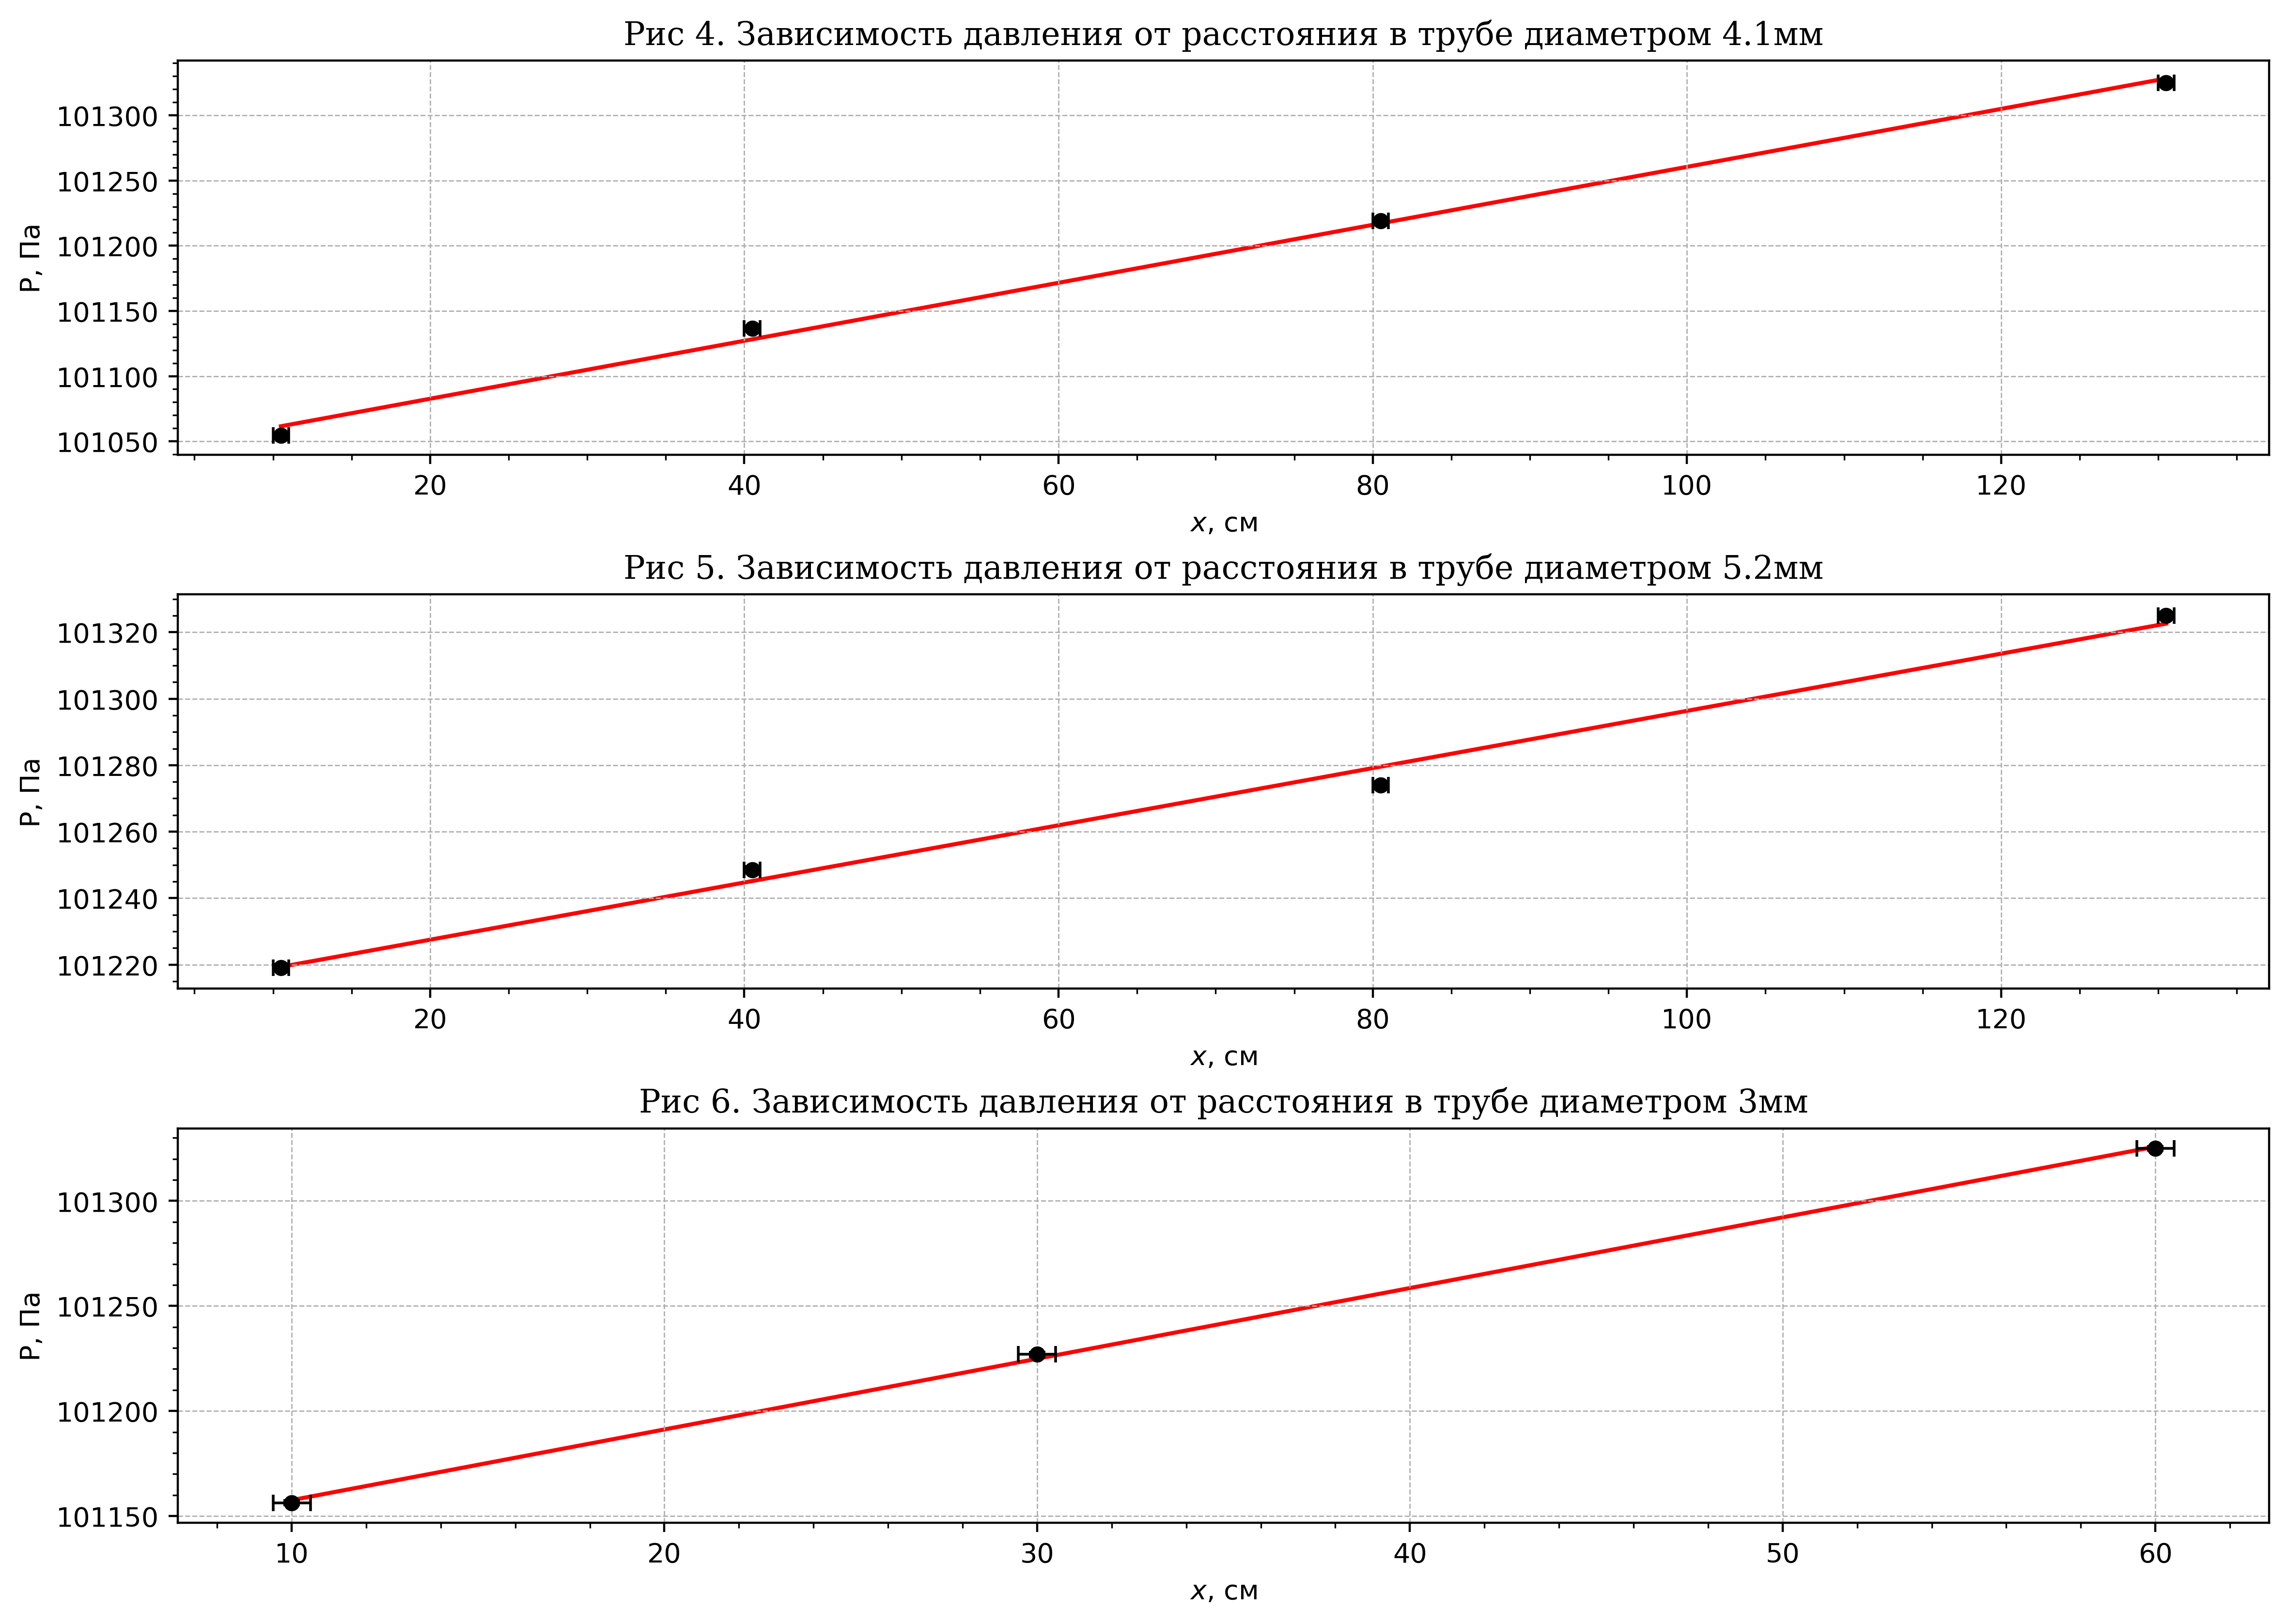

In [3]:
FONT = {'fontname': 'DejaVu Serif'}
fig2 = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')
spec = fig2.add_gridspec(3, 1)
ax4_1 = fig2.add_subplot(spec[0, 0])
ax5_2 = fig2.add_subplot(spec[1, 0])
ax3 = fig2.add_subplot(spec[2, 0])

[ax.minorticks_on() for ax in fig2.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5) for ax in fig2.axes]
[ax.set_xlabel('$x$, см') for ax in fig2.axes]
[ax.set_ylabel('P, Па') for ax in fig2.axes]
ax4_1.set_title('Рис 4. Зависимость давления от расстояния в трубе диаметром 4.1мм', **FONT) 
ax5_2.set_title('Рис 5. Зависимость давления от расстояния в трубе диаметром 5.2мм', **FONT) 
ax3.set_title('Рис 6. Зависимость давления от расстояния в трубе диаметром 3мм', **FONT) 

P0 = 101325
P4_1 = np.array( [P0 - 270.66, P0 - 188.29, P0 - 105.9, P0] )
#P4_1 = np.array( [270.66, 188.29, 105.9, 0] )
X4_1 = np.array( [10.5, 30+10.5, 10.5+30+40, 10.5+30+40+50] )
ax4_1.errorbar(X4_1, P4_1, fmt='ko', linewidth=0, markersize=5, elinewidth=1, 
    xerr=0.5, yerr=0.2 * 9.8067 * 0.5,
    capsize=3, zorder=3
)
(k, s_k, b, s_b) = lin_ls(X4_1, P4_1, through_null=False)
ax4_1.plot(X4_1, X4_1 * k + b, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')

P5_2 = np.array( [P0 - 105.91, P0 - 76.49, P0 - 50.99, P0] )
X5_2 = np.array( [10.5, 10.5+30, 10.5+30+40, 10.5+30+40+50] )
ax5_2.errorbar(X5_2, P5_2, fmt='ko', linewidth=0, markersize=5, elinewidth=1, 
    xerr=0.5, yerr=0.2 * 9.8067 * 0.5,
    capsize=3, zorder=3
)
(k, s_k, b, s_b) = lin_ls(X5_2, P5_2, through_null=False)
ax5_2.plot(X5_2, X5_2 * k + b, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')

P3 = np.array( [P0 - 168.67, P0 - 98.07, P0] )
X3 = np.array( [10, 10+20, 10+20+30] )
ax3.errorbar(X3, P3, fmt='ko', linewidth=0, markersize=5, elinewidth=1, 
    xerr=0.5, yerr=0.2 * 9.8067 * 0.5,
    capsize=3, zorder=3
)
(k, s_k, b, s_b) = lin_ls(X3, P3, through_null=False)
ax3.plot(X3, X3 * k + b, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')

Коэффиценты прямой (4.1) : k, s_k, b, s_b
32.969460712122455	1.6166216277901202	7.489819527996346	1.3732904947126237
Коэффиценты прямой (5.2) : k, s_k, b, s_b
106.88028155677834	12.398595387197497	30.614285714285643	3.596660157106085
Коэффиценты прямой (3) : k, s_k, b, s_b
26.220027216777822	1.038468359822942	2.866123280692861	0.7520124977285001
[ 0.65378   1.372938  1.96134   2.61512   3.2689    3.92268   4.57646
  5.23024   5.88402   7.19158   8.49914   9.8067   11.11426  12.42182 ]
[0.392268 0.784536 0.588402 1.176804 0.98067  1.569072 1.96134  2.353608
 2.745876 3.530412 4.314948 5.099484 4.707216 3.138144]
[0.4413015 0.98067   1.471005  1.96134   2.451675  2.94201   3.530412
 3.92268   4.413015  4.90335   5.88402   6.962757  8.2866615 9.8067   ]
1.9613399999999999 1.9613399999999999 1.9613399999999999
53.4 176.5 77.4
Коэффиценты прямой: k, s_k, b, s_b
2.12312152821798	0.3707334200910962	3.028846221641369	0.08350575232765756


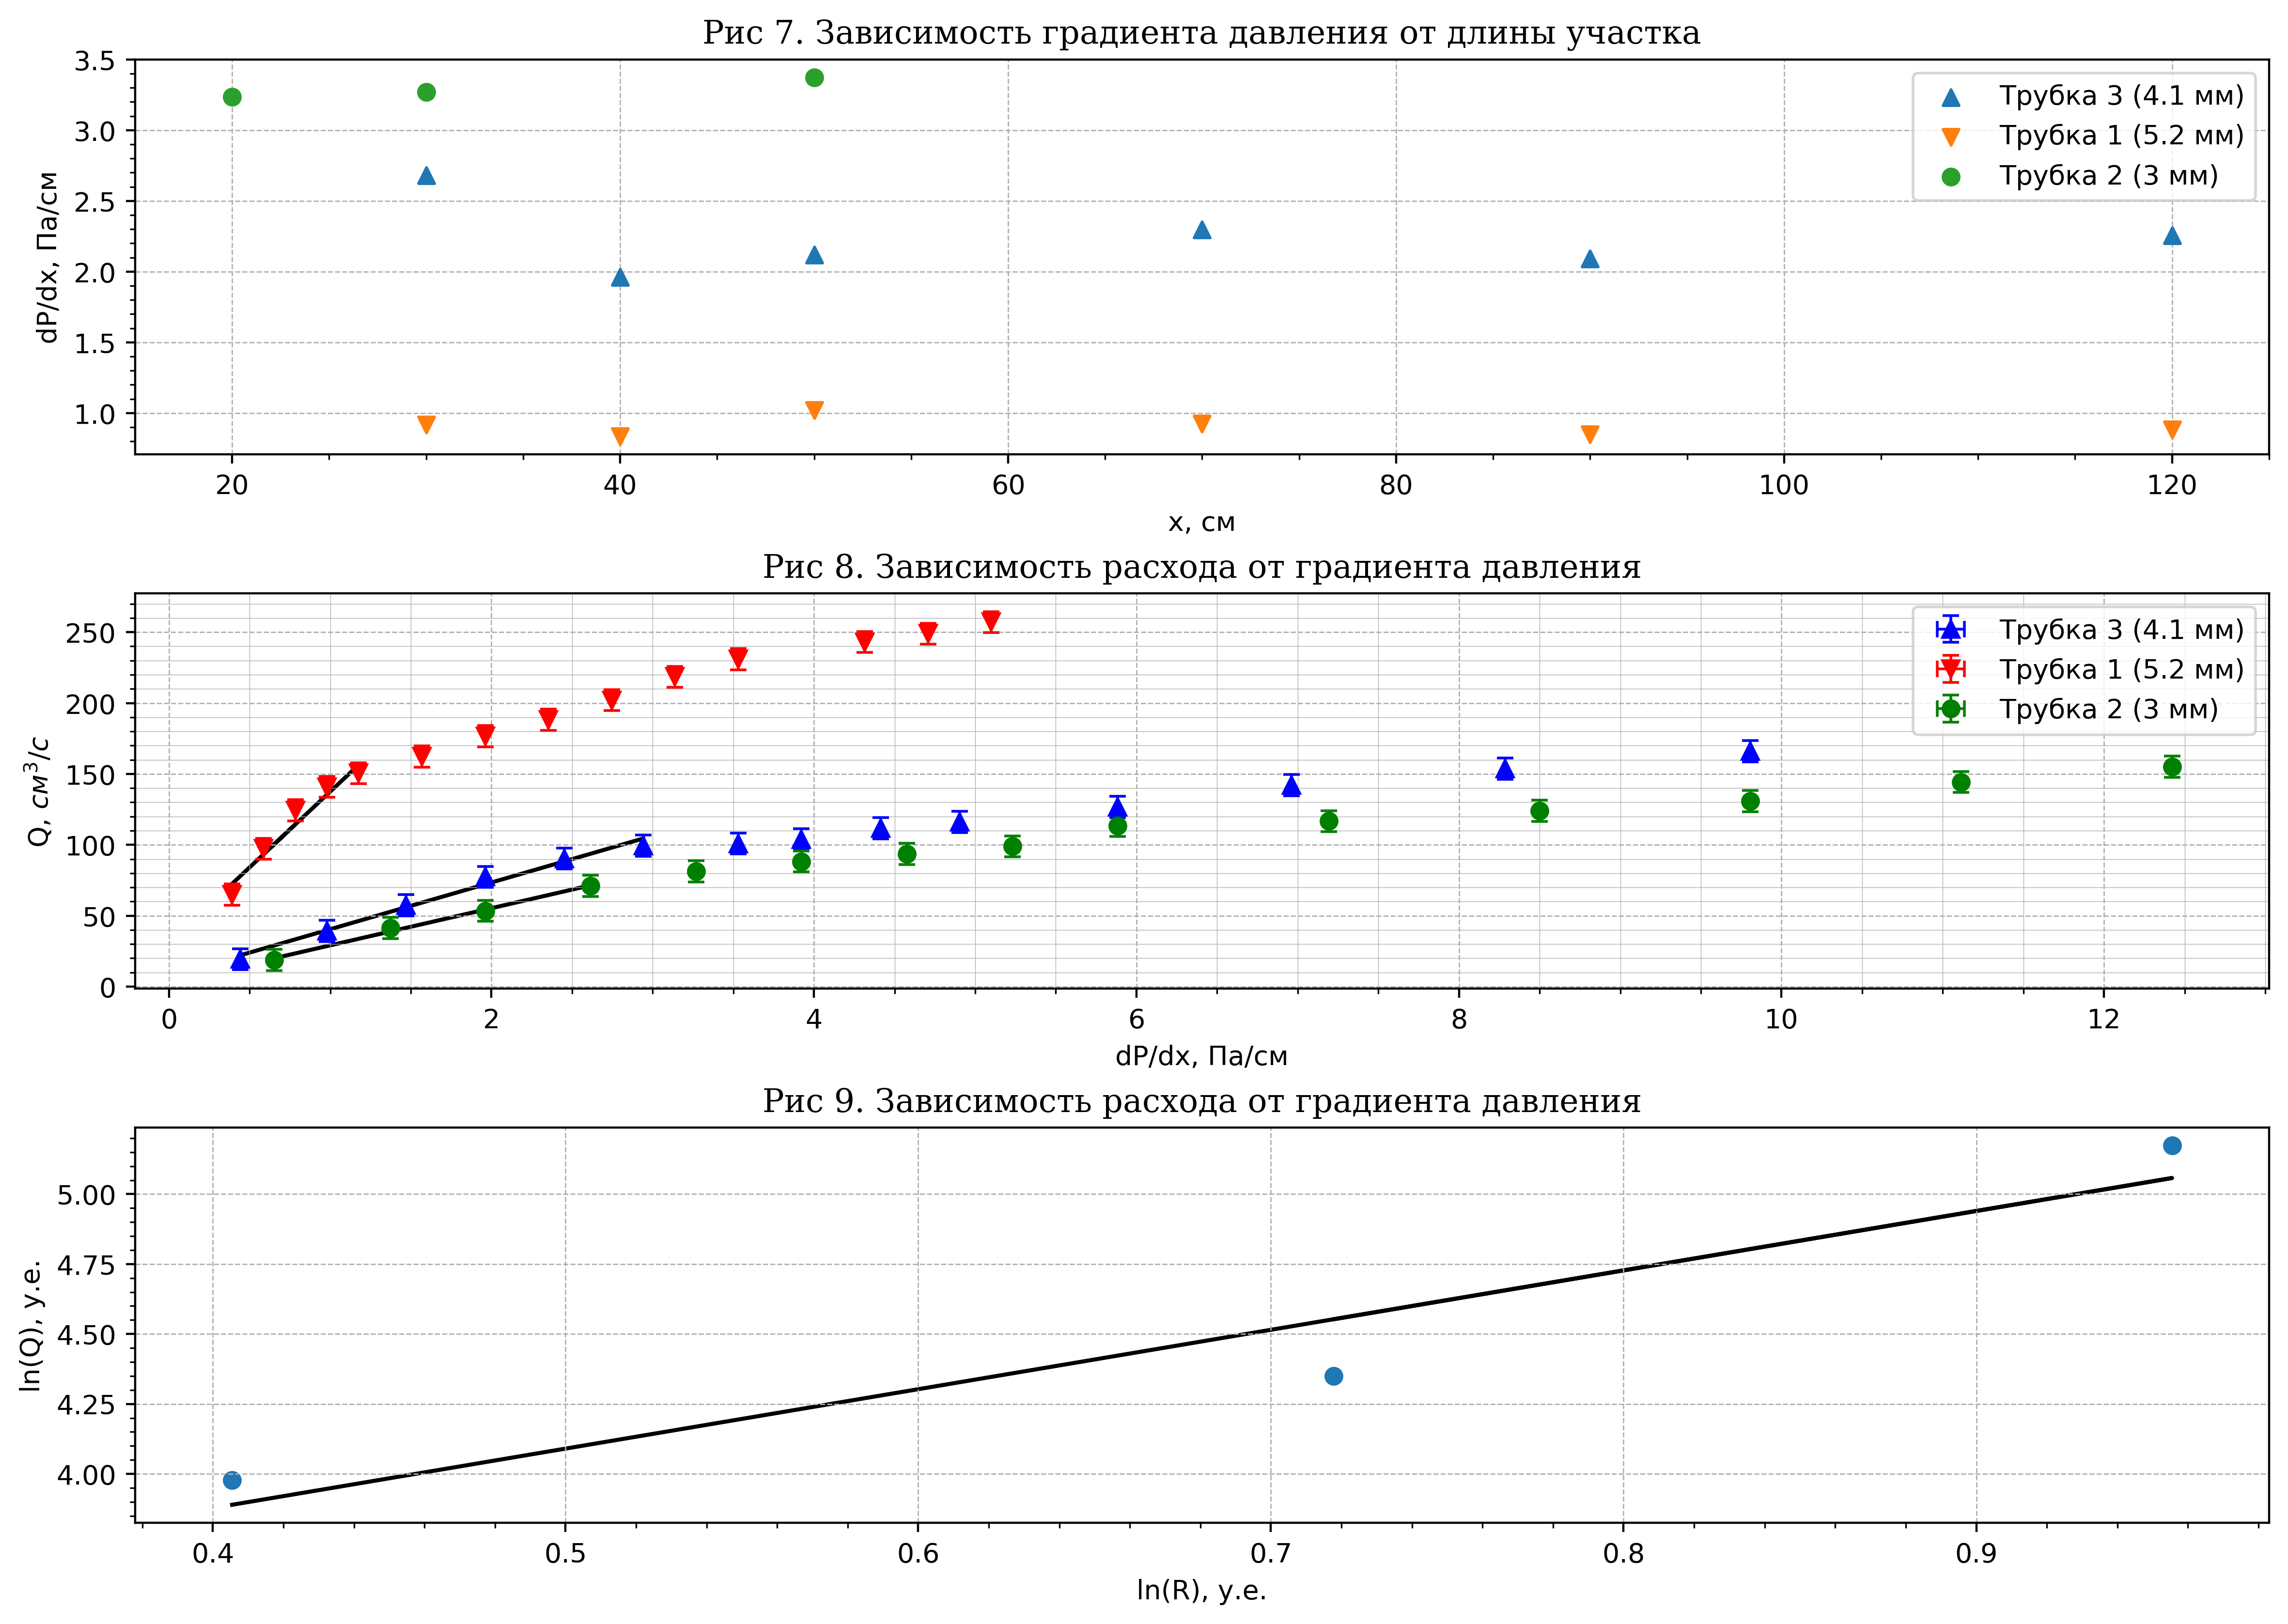

In [19]:
FONT = {'fontname': 'DejaVu Serif'}
fig = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')
spec = fig.add_gridspec(3, 1)
#ax4_1 = fig2.add_subplot(spec[0, 0])
ax_ln = fig.add_subplot(spec[2, 0])
ax_grad = fig.add_subplot(spec[1, 0])
ax_dp = fig.add_subplot(spec[0, 0])

[ax.minorticks_on() for ax in fig.axes]
[ax.grid(which='major', linestyle='--', linewidth=0.5, zorder=1) for ax in fig.axes]
ax_dp.set_xlabel('х, см')
ax_dp.set_ylabel('dP/dx, Па/см')
ax_dp.set_title('Рис 7. Зависимость градиента давления от длины участка', **FONT) 
Ps = np.array([80.41, 160.83, 270.66, 78.45, 188.29, 105.91])
ls = np.array([30, 70, 120, 40, 90, 50])
grads = Ps / ls
ax_dp.scatter(ls, grads, zorder=2, label='Трубка 3 (4.1 мм)', marker='^')
########
Ps = np.array([27.46, 64.72, 33.34, 76.49, 105.91, 50.99])
ls = np.array([30, 70, 40, 90, 120, 50])
grads = Ps / ls
ax_dp.scatter(ls, grads, zorder=2, label='Трубка 1 (5.2 мм)', marker='v')
########
Ps = np.array([64.72, 168.67, 98.07])
ls = np.array([20, 50, 30])
grads = Ps / ls
ax_dp.scatter(ls, grads, zorder=2, label='Трубка 2 (3 мм)')
#######################################
Qs4_1 = np.array( [19.31, 39.2, 57.3, 77.4, 90.3, 99.3, 100.9, 103.8, 111.8, 116.1, 126.7, 142, 153.7, 166.1] )
hs4_1 = np.array( [9, 20, 30, 40, 50, 60, 72, 80, 90, 100, 120, 142, 169, 200] )
dPs4_1 = hs4_1 * 0.2 * 9.8067 # checked this
GRAD4_1 = dPs4_1 / 40

Qs5_2 = np.array( [64.8, 124.4, 97.2, 150.5, 140.9, 162.3, 176.5, 188.3, 202.0, 230.9, 243.0, 257.1, 248.9, 218.5] )
hs5_2 = np.array( [10, 20, 15, 30, 25, 40, 50, 60, 70, 90, 110, 130, 120, 80] )
dPs5_2 = hs5_2 * 0.2 * 9.8067 # checked this
GRAD5_2 = dPs5_2 / 50

Qs3 = np.array( [18.7, 41.4, 53.4, 71.1, 81.4, 88.3, 93.5, 98.9, 113.5, 116.7, 124.1, 130.9, 144.3, 155] )
hs3 = np.array( [10, 21, 30, 40, 50, 60, 70, 80, 90, 110, 130, 150, 170, 190] )
dPs3 = hs3 * 0.2 * 9.8067
GRAD3 = dPs3 / 30

ax_grad.set_ylabel('Q, $cм^{3}/с$') 
ax_grad.set_xlabel('dP/dx, Па/см') 
ax_grad.set_title('Рис 8. Зависимость расхода от градиента давления', **FONT)
ax_grad.grid(which='minor', linestyle='-', linewidth=0.25, zorder=1)
#########################################################
#ax_grad.scatter(GRAD4_1, Qs4_1, label='Трубка 3',  marker='^', zorder=2)
sigma_dV = 0.01
sigma_dt = 0.31
dt = 6.45 # min
dV = 1000
Y_ERR = np.sqrt(
    np.square( sigma_dV / dt ) +
    np.square( dV * sigma_dt / (dt**2) )
)
sigma_dP = 0.2 * 9.8067 * 0.5
sigma_dx = 0.1
dx = 40
dP = max(dPs4_1)
X_ERR = np.sqrt(
    np.square( sigma_dP / dx ) +
    np.square( dP * sigma_dx / (dx * dx) )
)
X_ERR = 0
ax_grad.errorbar(GRAD4_1, Qs4_1, fmt='b^', linewidth=0, markersize=6, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3,
    label='Трубка 3 (4.1 мм)'
)
######
#ax_grad.scatter(GRAD5_2, Qs5_2, label='Трубка 1',  marker='v', zorder=2)
sigma_dP = 0.2 * 9.8067 * 0.5
sigma_dx = 0.1
dx = 50
dP = max(dPs5_2)
X_ERR = np.sqrt(
    np.square( sigma_dP / dx ) +
    np.square( dP * sigma_dx / (dx * dx) )
)
X_ERR = 0
ax_grad.errorbar(GRAD5_2, Qs5_2, fmt='rv', linewidth=0, markersize=6, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3,
    label='Трубка 1 (5.2 мм)'
)
#####
# ax_grad.scatter(GRAD3, Qs3, label='Трубка 2', zorder=2)
sigma_dP = 0.2 * 9.8067 * 0.5
sigma_dx = 0.1
dx = 30
dP = max(dPs3)
X_ERR = np.sqrt(
    np.square( sigma_dP / dx ) +
    np.square( dP * sigma_dx / (dx * dx) )
)
X_ERR = 0
ax_grad.errorbar(GRAD3, Qs3, fmt='go', linewidth=0, markersize=6, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3,
    label='Трубка 2 (3 мм)'
)
#################
LINEAR_TILL = 6
(k4_1, s_k4_1, b, s_b) = lin_ls(GRAD4_1[:LINEAR_TILL], Qs4_1[:LINEAR_TILL], through_null=False)
ax_grad.plot(GRAD4_1[:LINEAR_TILL], GRAD4_1[:LINEAR_TILL] * k4_1 + b, color='k', zorder=-1)
print('Коэффиценты прямой (4.1) : k, s_k, b, s_b')
print(k4_1, s_k4_1, b, s_b, sep='\t')
###################
LINEAR_TILL = 4
(k5_2, s_k5_2, b, s_b) = lin_ls(GRAD5_2[:LINEAR_TILL], Qs5_2[:LINEAR_TILL], through_null=False)
ax_grad.plot(GRAD5_2[:LINEAR_TILL], GRAD5_2[:LINEAR_TILL] * k5_2 + b, color='k', zorder=-1)
print('Коэффиценты прямой (5.2) : k, s_k, b, s_b')
print(k5_2, s_k5_2, b, s_b, sep='\t')
##################
LINEAR_TILL = 4
(k3, s_k3, b, s_b) = lin_ls(GRAD3[:LINEAR_TILL], Qs3[:LINEAR_TILL], through_null=False)
ax_grad.plot(GRAD3[:LINEAR_TILL], GRAD3[:LINEAR_TILL] * k3 + b, color='k', zorder=-1)
print('Коэффиценты прямой (3) : k, s_k, b, s_b')
print(k3, s_k3, b, s_b, sep='\t')

ax_dp.legend()
ax_grad.legend()

################

print(GRAD3, GRAD5_2, GRAD4_1, sep='\n')

print(GRAD3[2], GRAD5_2[6], GRAD4_1[3])
print(Qs3[2], Qs5_2[6], Qs4_1[3])
Q = np.array( [Qs3[2], Qs5_2[6], Qs4_1[3]] )
R = np.array( [3 / 2, 5.2 / 2, 4.1 / 2] )

ax_ln.set_ylabel('ln(Q), у.е.') 
ax_ln.set_xlabel('ln(R), у.е.') 
ax_ln.set_title('Рис 9. Зависимость расхода от градиента давления', **FONT)

ax_ln.scatter(np.log(R), np.log(Q))
(k, s_k, b, s_b) = lin_ls(np.log(R), np.log(Q), through_null=False)
ax_ln.plot(np.log(R), np.log(R) * k + b, color='k', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')

In [5]:
n = 1812
R4_1 = 8 * n * k4_1 / np.pi
R5_2 = 8 * n * k5_2 / np.pi
R3   = 8 * n * k3   / np.pi

print(R4_1, R5_2, R3)
print(2 * (np.sqrt(np.sqrt( np.array( [R4_1, R5_2, R3] ) )) / 10))
gamma = 8 * n / np.pi
eps_k4_1 = k4_1 / s_k4_1
eps_R4_1 = eps_k4_1 / (gamma * 4)

eps_k5_2 = k5_2 / s_k5_2
eps_R5_2 = eps_k5_2 / (gamma * 4)

eps_k3 = k3 / s_k3
eps_R3 = eps_k3 / (gamma * 4)
print(2 * eps_R4_1 * 100, 2 * eps_R5_2 * 100, 2 * eps_R3 * 100)

152128.34863769426 493169.1445345989 120984.97687155599
[3.94986756 5.30003783 3.73003457]
0.2209912891666991 0.09341073693628436 0.2735971479810545
